# Hoja de Trabajo 5

## Ejercicio 3

### Inciso C

Obtener la tasa de convergencia $r$ y la constante $C$ para el algoritmo de Newton-Raphson

In [1]:
from algoritmos import SolverNewton, SolverBiseccion
import numpy as np
import pandas as pd

# Se define la función lambda a resolver (derivada de la función)
f = lambda x : 16*x**3 - 4

# Se obtiene la respuesta al problema utilizando el método de Newton
# Se inicia desde 0 para obtener más puntos de error.
xk, df_Newton = SolverNewton(f, 1, 70, 0.0001)

# Se despliega la tabla resultante
df_Newton

,Iter,Xk,Error
0,1.0,0.750000,2.750000
1,2.0,0.648148,0.356551
2,3.0,0.630466,0.009639
3,4.0,0.629961,0.000008


Se busca resolver el siguiente problema utilizando una regresión lineal: 

$$
\underbrace{\ln \left|e_{k+1}\right|}_{y}=r \underbrace{\ln \left|e_{k}\right|}_{x}+\ln C .
$$

In [2]:
from sklearn.linear_model import LinearRegression

# La columna de "Error" de la tabla se extrae en la forma de un array de numpy
error_newton = df_Newton["Error"].to_numpy()

# Se extraen dos arrays:
# - ek: Valores que van desde el índice 0 hasta el penúltimo índice (Time step k)
# - ek1: Valores que van desde el índice 1 hasta el último índice (Time step k+1)
ek = error_newton[0:-1]
ek1 = error_newton[1:len(error_newton)]

# Se define la "X" y "Y" del problema de regresión
X = np.log(ek)
Y = np.log(ek1)

# Se redimensionan los arrays para ser bidimensionales
X = np.reshape(X, (-1, 1))
Y = np.reshape(Y, (-1, 1))

# Se hace la regresión lineal
reg = LinearRegression().fit(X,Y)

# Se imprimen los resultados
print(f"R2 = {reg.score(X,Y)} | M (r) = {reg.coef_[0,0]} | B (ln(C)) = {reg.intercept_[0]}")

# Se imprime la tasa de convergencia del algoritmo y el coeficiente
print(f"r = {reg.coef_[0,0]} | C = {np.exp(reg.intercept_[0])}")

R2 = 0.9992056006164993 | M (r) = 1.9083427423351704 | B (ln(C)) = -2.84958750044381
r = 1.9083427423351704 | C = 0.05786818655347996


### Inciso D

Obtener la tasa de convergencia $r$ y la constante $C$ para el método de Bisección

In [3]:
# Se obtiene la respuesta al problema utilizando el método de Newton
# Se inicia desde 0 para obtener más puntos de error.
xk, df_Biseccion = SolverBiseccion(f, -100, 100, 70, 0.0001)

# Se despliega la tabla resultante
df_Biseccion

,Iter,Xk,Error
0,1.0,50.000000,1.999996e+06
1,2.0,25.000000,2.499960e+05
2,3.0,12.500000,3.124600e+04
3,4.0,6.250000,3.902250e+03
4,5.0,3.125000,4.842812e+02
5,6.0,1.562500,5.703516e+01
6,7.0,0.781250,3.629395e+00
7,8.0,0.390625,3.046326e+00
8,9.0,0.585938,7.813492e-01
9,10.0,0.683594,1.111098e+00


In [4]:
# La columna de "Error" de la tabla se extrae en la forma de un array de numpy
error_biseccion = df_Biseccion["Error"].to_numpy()

# Se extraen dos arrays:
# - ek: Valores que van desde el índice 0 hasta el penúltimo índice (Time step k)
# - ek1: Valores que van desde el índice 1 hasta el último índice (Time step k+1)
ek = error_biseccion[0:-1]
ek1 = error_biseccion[1:len(error_biseccion)]

# Se define la "X" y "Y" del problema de regresión
X = np.log(ek)
Y = np.log(ek1)

# Se redimensionan los arrays para ser bidimensionales
X = np.reshape(X, (-1, 1))
Y = np.reshape(Y, (-1, 1))

# Se hace la regresión lineal
reg = LinearRegression().fit(X,Y)

# Se imprimen los resultados
print(f"R2 = {reg.score(X,Y)} | M (r) = {reg.coef_[0,0]} | B (ln(C)) = {reg.intercept_[0]}")

# Se imprime la tasa de convergencia del algoritmo y el coeficiente
print(f"r = {reg.coef_[0,0]} | C = {np.exp(reg.intercept_[0])}")

R2 = 0.9686790791504611 | M (r) = 0.9185658367641278 | B (ln(C)) = -1.1592840884620477
r = 0.9185658367641278 | C = 0.3137106896110934


### Inciso E

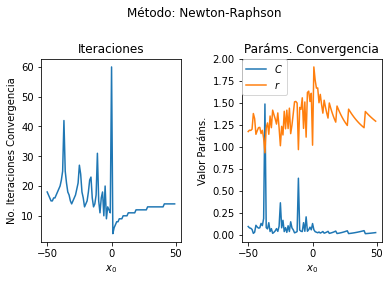

In [5]:
import matplotlib.pyplot as plt

x0_range = [*range(-50, 50)]
IterConver = []
r_range = []
C_range = []

for x0 in x0_range:

    xk, df = SolverNewton(f, x0, 200, 0.0001)

    # Agrega el número de iteraciones para converger
    IterConver.append(len(df))

    # La columna de "Error" de la tabla se extrae en la forma de un array de numpy
    error = df["Error"].to_numpy()

    # Se extraen dos arrays:
    # - ek: Valores que van desde el índice 0 hasta el penúltimo índice (Time step k)
    # - ek1: Valores que van desde el índice 1 hasta el último índice (Time step k+1)
    ek = error[0:-1]
    ek1 = error[1:len(error)]

    # Se define la "X" y "Y" del problema de regresión
    X = np.log(ek)
    Y = np.log(ek1)

    # Se redimensionan los arrays para ser bidimensionales
    X = np.reshape(X, (-1, 1))
    Y = np.reshape(Y, (-1, 1))

    # Se hace la regresión lineal
    reg = LinearRegression().fit(X,Y)

    # Se guardan los valores de r y C
    r_range.append(reg.coef_[0,0])
    C_range.append(np.exp(reg.intercept_[0]))


fig, axs = plt.subplots(1, 2)
fig.tight_layout(pad=3.0)

# Gráfica de la izquierda
axs[0].plot(x0_range, IterConver)
axs[0].set_title('Iteraciones')
axs[0].set(ylabel="No. Iteraciones Convergencia")

# Gráfica de la derecha
axs[1].plot(x0_range, C_range, label = "$C$")
axs[1].plot(x0_range, r_range, label = "$r$")
axs[1].set_title('Paráms. Convergencia')
axs[1].legend(loc = "upper left", borderaxespad=0)
axs[1].set(ylabel="Valor Paráms.")

# Coloca X labels comunes
for ax in axs.flat:
    ax.set(xlabel='$x_0$')

# Ajusta y coloca el título de ambas gráficas
fig.subplots_adjust(top=0.8)
plt.suptitle("Método: Newton-Raphson\n")
plt.show()

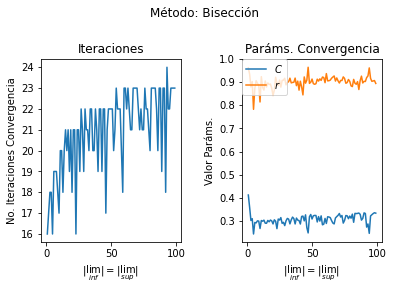

In [7]:
x0_range = [*range(1, 100)]
IterConver = []
r_range = []
C_range = []

for x0 in x0_range:

    xk, df = SolverBiseccion(f, -x0, x0, 200, 0.0001)

    # Agrega el número de iteraciones para converger
    IterConver.append(len(df))

    # La columna de "Error" de la tabla se extrae en la forma de un array de numpy
    error = df["Error"].to_numpy()

    # Se extraen dos arrays:
    # - ek: Valores que van desde el índice 0 hasta el penúltimo índice (Time step k)
    # - ek1: Valores que van desde el índice 1 hasta el último índice (Time step k+1)
    ek = error[0:-1]
    ek1 = error[1:len(error)]

    # Se define la "X" y "Y" del problema de regresión
    X = np.log(ek)
    Y = np.log(ek1)

    # Se redimensionan los arrays para ser bidimensionales
    X = np.reshape(X, (-1, 1))
    Y = np.reshape(Y, (-1, 1))

    # Se hace la regresión lineal
    reg = LinearRegression().fit(X,Y)

    # Se guardan los valores de r y C
    r_range.append(reg.coef_[0,0])
    C_range.append(np.exp(reg.intercept_[0]))


fig, axs = plt.subplots(1, 2)
fig.tight_layout(pad=3.0)

# Gráfica de la izquierda
axs[0].plot(x0_range, IterConver)
axs[0].set_title('Iteraciones')
axs[0].set(ylabel="No. Iteraciones Convergencia")

# Gráfica de la derecha
axs[1].plot(x0_range, C_range, label = "$C$")
axs[1].plot(x0_range, r_range, label = "$r$")
axs[1].set_title('Paráms. Convergencia')
axs[1].legend(loc = "upper left", borderaxespad=0)
axs[1].set(ylabel="Valor Paráms.")

# Coloca X y Y labels comunes
for ax in axs.flat:
    ax.set(xlabel='$|\lim_{inf}| = |\lim_{sup}|$')

# Ajusta y coloca el título de ambas gráficas
fig.subplots_adjust(top=0.8)
plt.suptitle("Método: Bisección\n")
plt.show()